In [156]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

from calibration import calibrationFunctions as cal
from tweezepy import AV, PSD, MLE

Using: ../Data\2025\April\24\100 fM with BSA\2\DataTSV


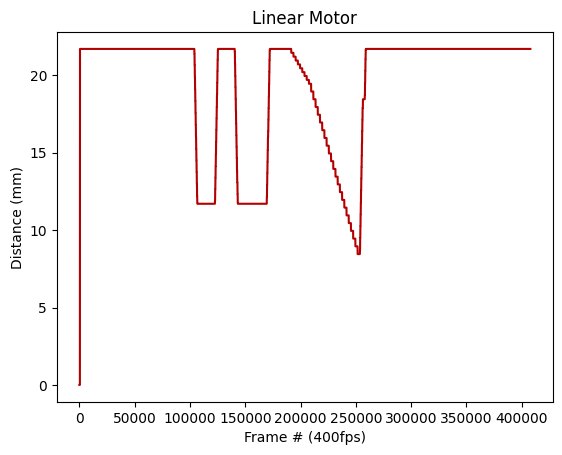

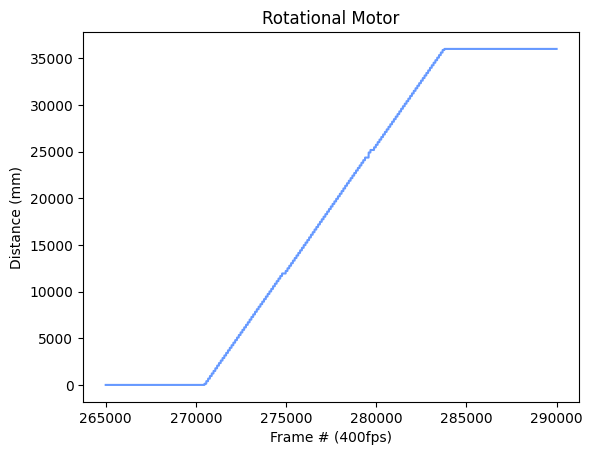

In [157]:
# folderPath = r"C:\Users\Perkins Lab\Desktop\Caleb Maddry\Data\2025\April\24\100 fM with BSA\2\DataTSV";
folderPath = r"../Data\2025\April\24\100 fM with BSA\2\DataTSV"

dataFrame = cal.openFiles(folderPath, numRef=2, numExp=4, fps=400) # 5 total beads

lowStart = 145000
lowEnd = 168000

highStart = 138000
highEnd = 140000

forceExtStart = 175000
forceExtEnd = 250000

spinStart = 265000
spinEnd = 290000

plt.plot(dataFrame["linearMotor"], color="#b30000")
plt.xlabel("Frame # (400fps)"); plt.ylabel("Distance (mm)"); plt.title("Linear Motor")
plt.show()

plt.plot(dataFrame["rotationalMotor"][265000:290000], color="#6699ff")
plt.xlabel("Frame # (400fps)"); plt.ylabel("Distance (mm)"); plt.title("Rotational Motor")
plt.show()

### List of good beads
1, 2, 4

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


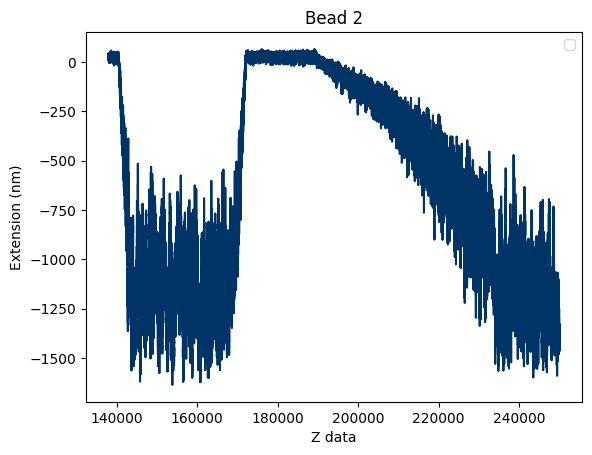

In [158]:
extension = dataFrame["zExpBead2"] - dataFrame["zRefBead1"]
beadX = dataFrame["xExpBead2"] - dataFrame["xRefBead1"]
beadY = dataFrame["yExpBead2"] - dataFrame["yRefBead1"]

plt.plot(extension[highStart:forceExtEnd], color="#003366")
plt.title("Bead 2"); plt.xlabel("Z data"); plt.ylabel("Extension (nm)")
plt.legend()
plt.show()

# Bead 2

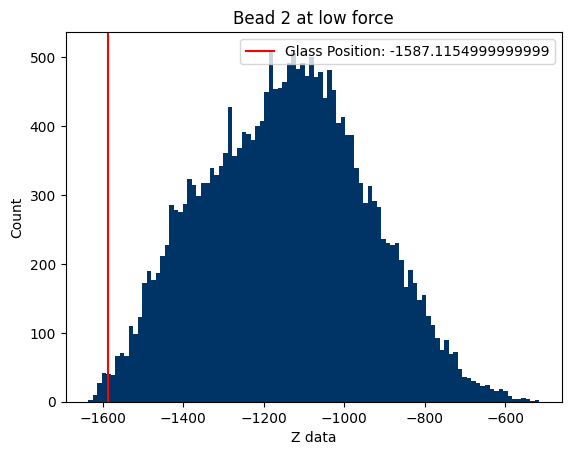

In [159]:
ref = dataFrame["zRefBead1"][lowStart:lowEnd]
exp = dataFrame["zExpBead2"][lowStart:lowEnd]

glassPosition = np.mean(np.sort(exp - ref)[0:200])

plt.hist(exp - ref, bins=100, color="#003366")
plt.axvline(glassPosition, color="red", label=f"Glass Position: {glassPosition}")
plt.title("Bead 2 at low force"); plt.xlabel("Z data"); plt.ylabel("Count")
plt.legend()
plt.show()

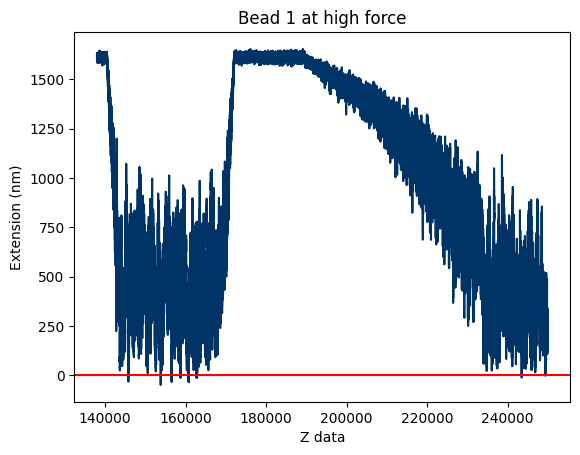

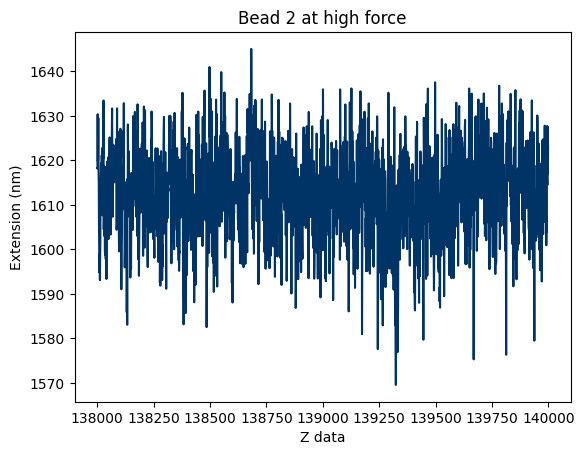

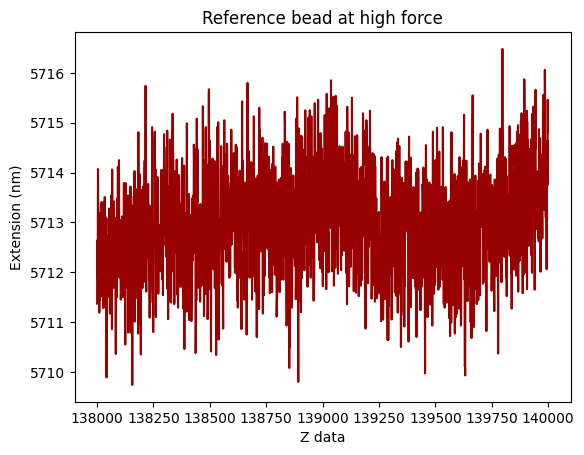

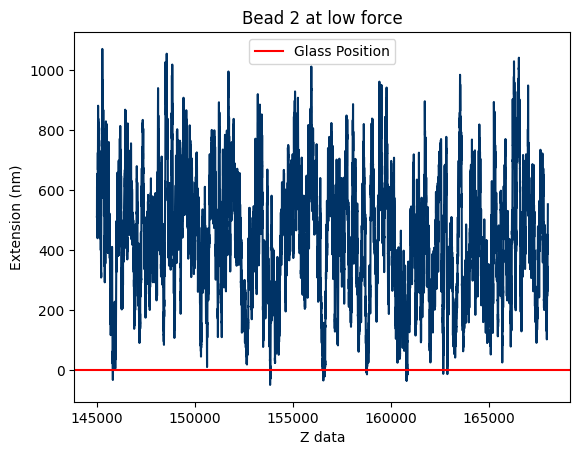

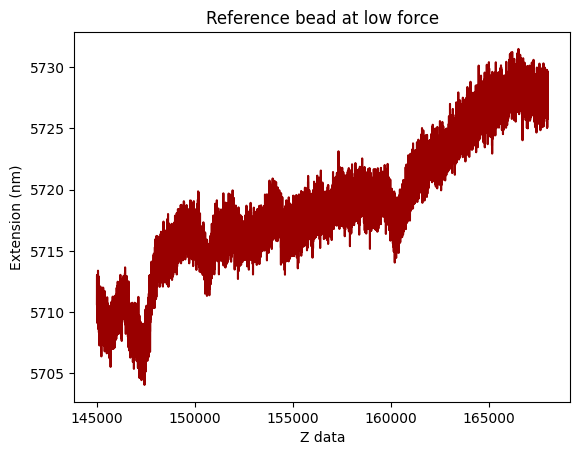

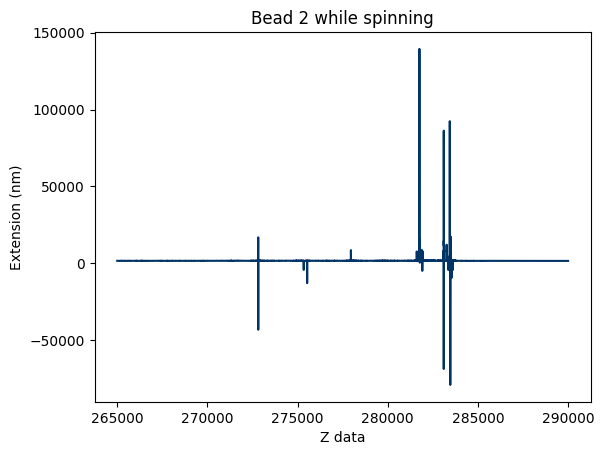

In [160]:
extension = dataFrame["zExpBead2"] - dataFrame["zRefBead1"] - glassPosition
beadX = dataFrame["xExpBead2"] - dataFrame["xRefBead1"]
beadY = dataFrame["yExpBead2"] - dataFrame["yRefBead1"]

plt.plot(extension[highStart:forceExtEnd], color="#003366")
plt.axhline(0, color="red", label="Glass Position")
plt.title("Bead 1 at high force"); plt.xlabel("Z data"); plt.ylabel("Extension (nm)")
plt.show()

plt.plot(extension[highStart:highEnd], color="#003366")
plt.title("Bead 2 at high force"); plt.xlabel("Z data"); plt.ylabel("Extension (nm)")
plt.show()

plt.plot(dataFrame["zRefBead1"][highStart:highEnd], color="#990000")
plt.title("Reference bead at high force"); plt.xlabel("Z data"); plt.ylabel("Extension (nm)")
plt.show()

plt.plot(extension[lowStart:lowEnd], color="#003366")
plt.title("Bead 2 at low force"); plt.xlabel("Z data"); plt.ylabel("Extension (nm)")
plt.axhline(0, color="red", label="Glass Position")
plt.legend()
plt.show()

plt.plot(dataFrame["zRefBead1"][lowStart:lowEnd], color="#990000")
plt.title("Reference bead at low force"); plt.xlabel("Z data"); plt.ylabel("Extension (nm)")
plt.show()

plt.plot(extension[spinStart:spinEnd], color="#003366")
plt.title("Bead 2 while spinning"); plt.xlabel("Z data"); plt.ylabel("Extension (nm)")
plt.show()

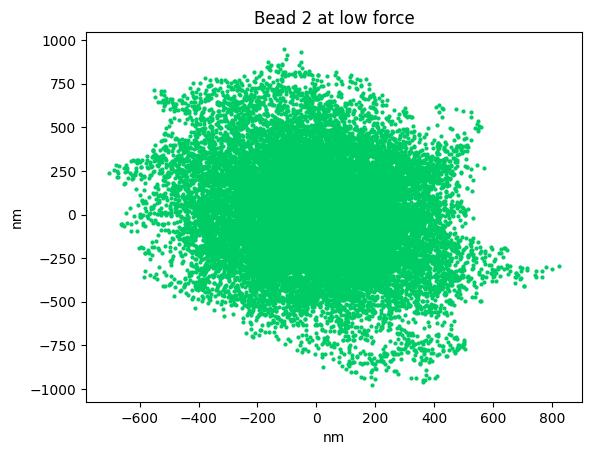

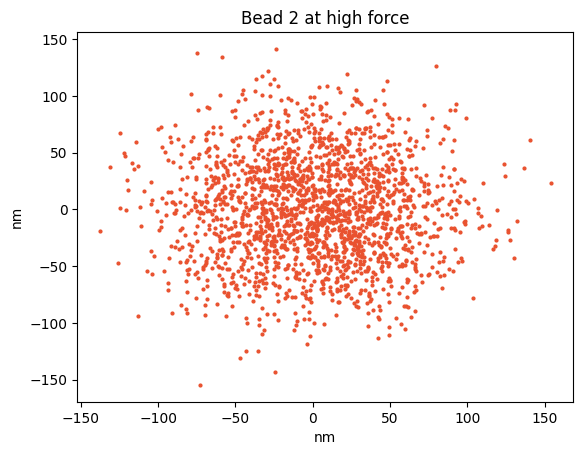

In [161]:
plt.scatter(beadX[lowStart:lowEnd] - np.mean(beadX[lowStart:lowEnd]), beadY[lowStart:lowEnd] - np.mean(beadY[lowStart:lowEnd]), s=4, color='#00cc66')
plt.title("Bead 2 at low force"); plt.xlabel("nm"); plt.ylabel("nm")
plt.show()

plt.scatter(beadX[highStart:highEnd] - np.mean(beadX[highStart:highEnd]), beadY[highStart:highEnd] - np.mean(beadY[highStart:highEnd]), s=4, color='#E9522F')
plt.title("Bead 2 at high force"); plt.xlabel("nm"); plt.ylabel("nm")
plt.show()

Low force using AV:  0.03742159914249711
Low force using PSD:  0.03756344406303263
Low force using F = KbT*L/<x>:  0.035881091884154975


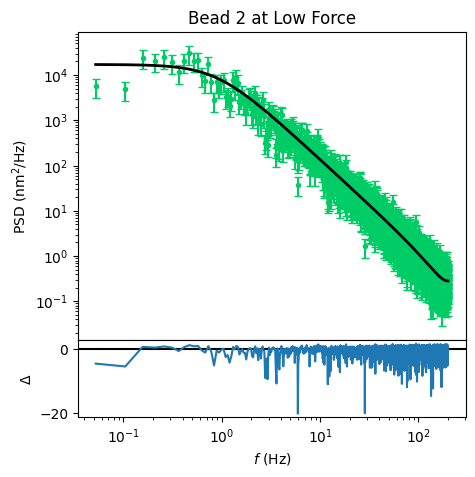

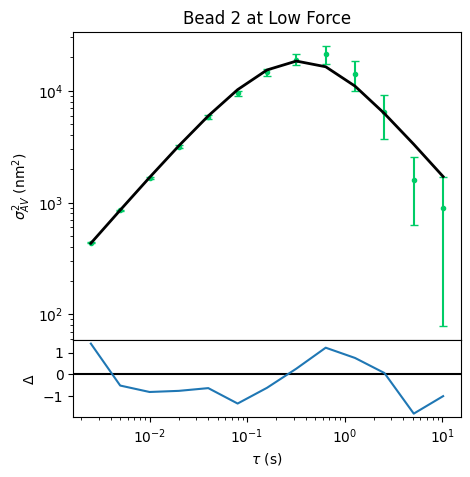

High force using AV:  2.7177225991426663
High force using PSD:  2.718414347327876
High force using F = KbT*L/<x>:  3.211390920187549


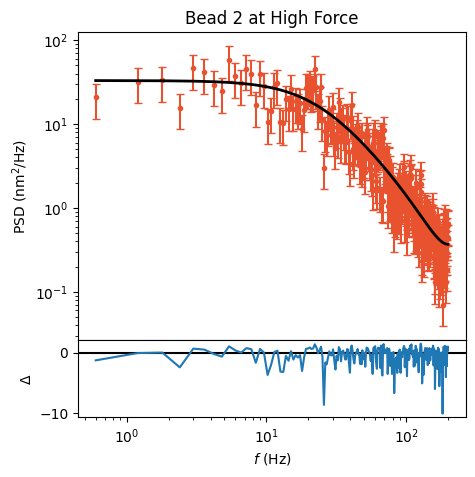

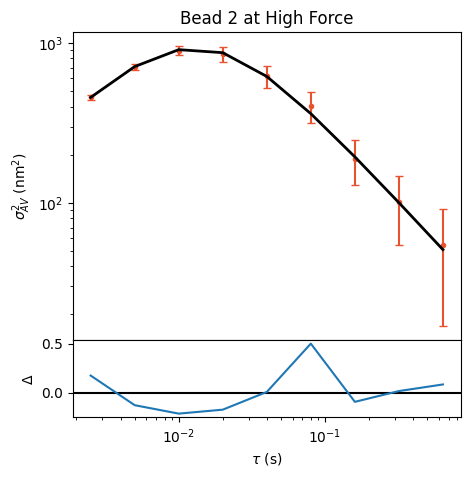

In [162]:
beadDiameter = 1000
fps = 400

medStart = 137000
medEnd = 138500

# Math
psd = PSD(beadX[lowStart:lowEnd], fps, bins=5)
psd.mlefit(viscosity=1e-9, radius=beadDiameter/2)
av = AV(beadX[lowStart:lowEnd], fps)
av.mlefit(viscosity=1e-9, radius=beadDiameter/2)

# Calculation and printing of the force
force = av.results['k']*np.mean(extension[lowStart:lowEnd])
print('Low force using AV: ', force)
force = psd.results['k']*np.mean(extension[lowStart:lowEnd])
print('Low force using PSD: ', force)
force = 4.1*np.mean(extension[lowStart:lowEnd])/np.var(beadX[lowStart:lowEnd])
print('Low force using F = KbT*L/<x>: ', force)

# Printing of PSD and AV Plots
fig, ax = psd.plot(data_color='#00cc66') #PSD
ax[0].set_title('Bead 2 at Low Force'); ax[0].set_xlabel('f (Hz)');
plt.show()

fig, ax = av.plot(data_color='#00cc66') #AV
ax[0].set_title('Bead 2 at Low Force')
plt.show()

# Math
psd = PSD(beadX[highStart:highEnd], fps, bins=5)
psd.mlefit(viscosity=1e-9, radius=beadDiameter/2)
av = AV(beadX[highStart:highEnd], fps)
av.mlefit(viscosity=1e-9, radius=beadDiameter/2)


# Calculation and printing of the force
force = av.results['k']*np.mean(extension[highStart:highEnd])
print('High force using AV: ', force)
force = psd.results['k']*np.mean(extension[highStart:highEnd])
print('High force using PSD: ', force)
force = 4.1*np.mean(extension[highStart:highEnd])/np.var(beadY[highStart:highEnd])
print('High force using F = KbT*L/<x>: ', force)

# Printing of PSD and AV Plots
fig, ax = psd.plot(data_color='#E9522F') #PSD
ax[0].set_title('Bead 2 at High Force'); ax[0].set_xlabel('f (Hz)');
plt.show()

fig, ax = av.plot(data_color='#E9522F') #AV
ax[0].set_title('Bead 2 at High Force')
plt.show()

# Bead 1

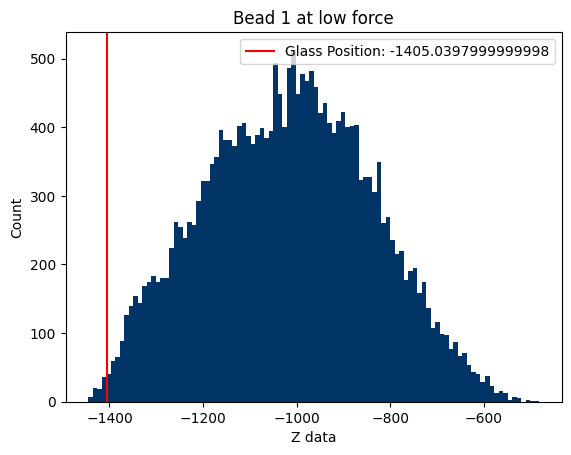

In [163]:
ref = dataFrame["zRefBead1"][lowStart:lowEnd]
exp = dataFrame["zExpBead1"][lowStart:lowEnd]

glassPosition = np.mean(np.sort(exp - ref)[0:200])

plt.hist(exp - ref, bins=100, color="#003366")
plt.axvline(glassPosition, color="red", label=f"Glass Position: {glassPosition}")
plt.title("Bead 1 at low force"); plt.xlabel("Z data"); plt.ylabel("Count")
plt.legend()
plt.show()

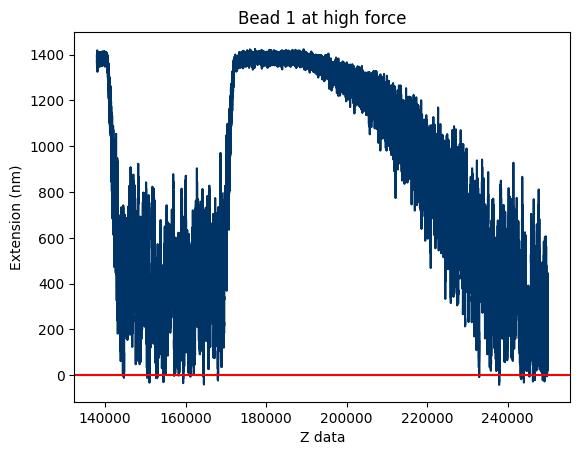

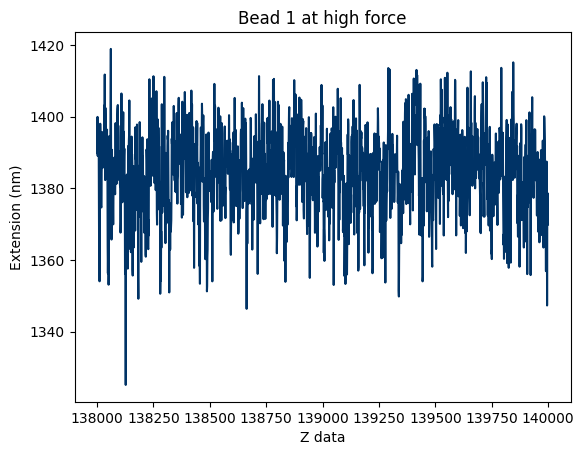

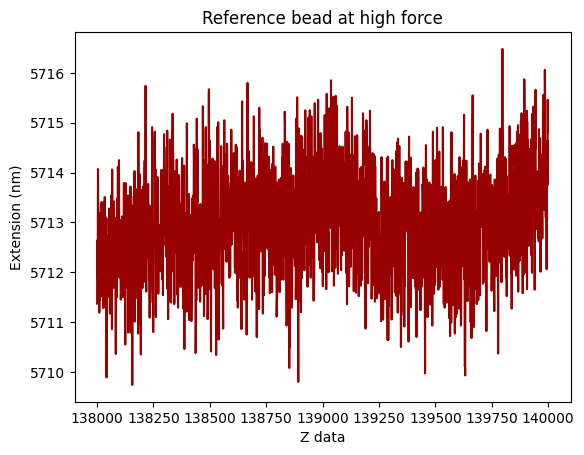

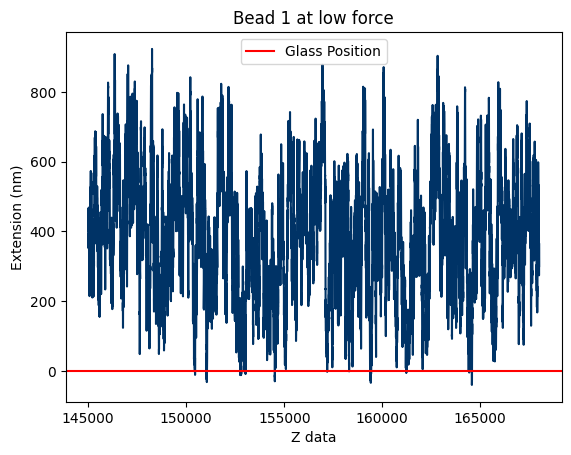

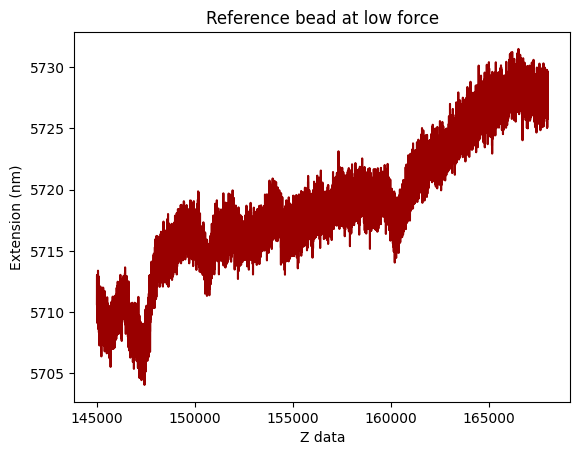

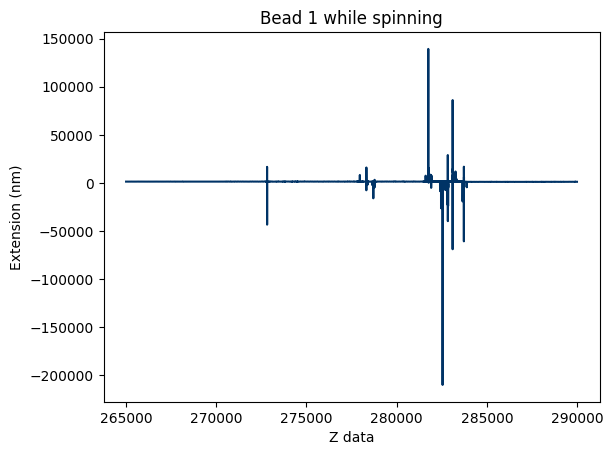

In [164]:
extension = dataFrame["zExpBead1"] - dataFrame["zRefBead1"] - glassPosition
beadX = dataFrame["xExpBead1"] - dataFrame["xRefBead1"]
beadY = dataFrame["yExpBead1"] - dataFrame["yRefBead1"]

plt.plot(extension[highStart:forceExtEnd], color="#003366")
plt.axhline(0, color="red", label="Glass Position")
plt.title("Bead 1 at high force"); plt.xlabel("Z data"); plt.ylabel("Extension (nm)")
plt.show()

plt.plot(extension[highStart:highEnd], color="#003366")
plt.title("Bead 1 at high force"); plt.xlabel("Z data"); plt.ylabel("Extension (nm)")
plt.show()

plt.plot(dataFrame["zRefBead1"][highStart:highEnd], color="#990000")
plt.title("Reference bead at high force"); plt.xlabel("Z data"); plt.ylabel("Extension (nm)")
plt.show()

plt.plot(extension[lowStart:lowEnd], color="#003366")
plt.title("Bead 1 at low force"); plt.xlabel("Z data"); plt.ylabel("Extension (nm)")
plt.axhline(0, color="red", label="Glass Position")
plt.legend()
plt.show()

plt.plot(dataFrame["zRefBead1"][lowStart:lowEnd], color="#990000")
plt.title("Reference bead at low force"); plt.xlabel("Z data"); plt.ylabel("Extension (nm)")
plt.show()

plt.plot(extension[spinStart:spinEnd], color="#003366")
plt.title("Bead 1 while spinning"); plt.xlabel("Z data"); plt.ylabel("Extension (nm)")
plt.show()

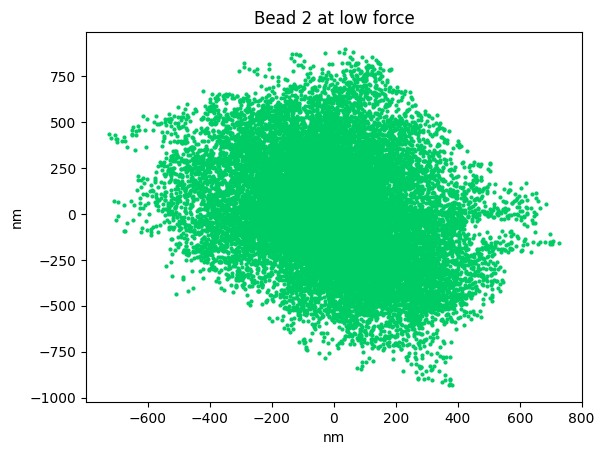

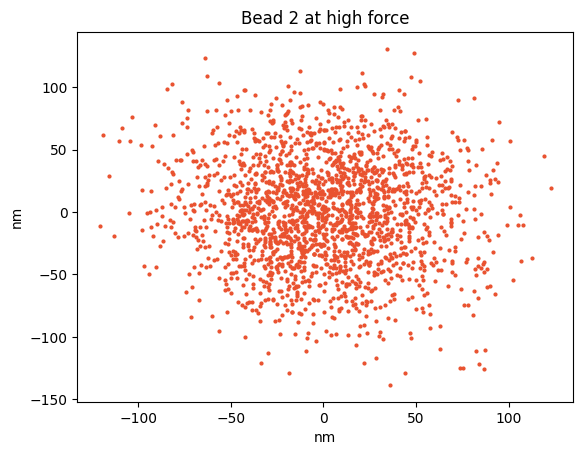

In [165]:
plt.scatter(beadX[lowStart:lowEnd] - np.mean(beadX[lowStart:lowEnd]), beadY[lowStart:lowEnd] - np.mean(beadY[lowStart:lowEnd]), s=4, color='#00cc66')
plt.title("Bead 2 at low force"); plt.xlabel("nm"); plt.ylabel("nm")
plt.show()

plt.scatter(beadX[highStart:highEnd] - np.mean(beadX[highStart:highEnd]), beadY[highStart:highEnd] - np.mean(beadY[highStart:highEnd]), s=4, color='#E9522F')
plt.title("Bead 2 at high force"); plt.xlabel("nm"); plt.ylabel("nm")
plt.show()

Low force using AV:  0.035946228525914226
Low force using PSD:  0.03582037360824295
Low force using F = KbT*L/<x>:  0.036016528815846494


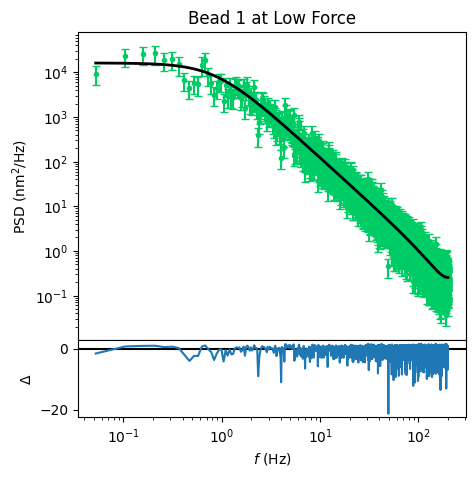

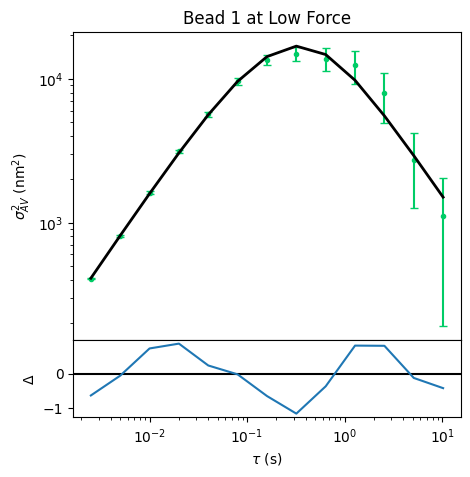

High force using AV:  3.133347740010781
High force using PSD:  3.20263065207545
High force using F = KbT*L/<x>:  3.1291778999243363


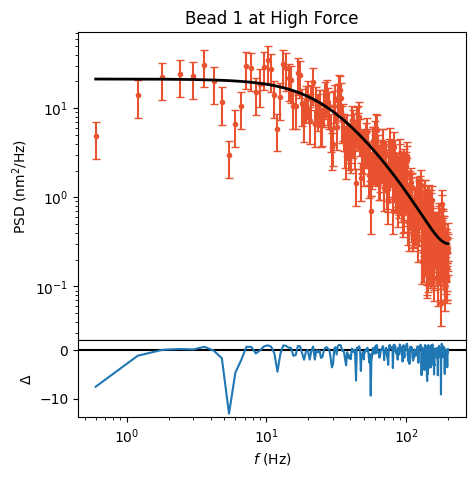

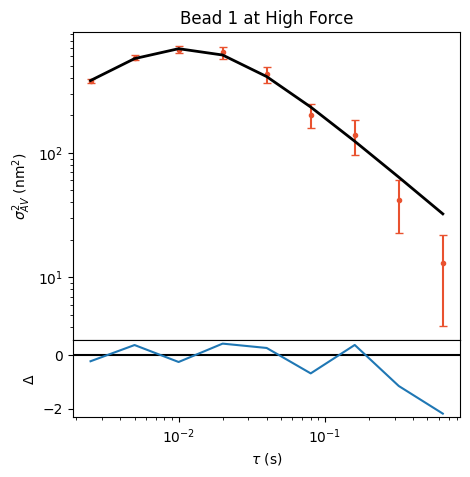

In [166]:
beadDiameter = 1000
fps = 400

medStart = 137000
medEnd = 138500

# Math
psd = PSD(beadX[lowStart:lowEnd], fps, bins=5)
psd.mlefit(viscosity=1e-9, radius=beadDiameter/2)
av = AV(beadX[lowStart:lowEnd], fps)
av.mlefit(viscosity=1e-9, radius=beadDiameter/2)

# Calculation and printing of the force
force = av.results['k']*np.mean(extension[lowStart:lowEnd])
print('Low force using AV: ', force)
force = psd.results['k']*np.mean(extension[lowStart:lowEnd])
print('Low force using PSD: ', force)
force = 4.1*np.mean(extension[lowStart:lowEnd])/np.var(beadX[lowStart:lowEnd])
print('Low force using F = KbT*L/<x>: ', force)

# Printing of PSD and AV Plots
fig, ax = psd.plot(data_color='#00cc66') #PSD
ax[0].set_title('Bead 1 at Low Force'); ax[0].set_xlabel('f (Hz)');
plt.show()

fig, ax = av.plot(data_color='#00cc66') #AV
ax[0].set_title('Bead 1 at Low Force')
plt.show()

# Math
psd = PSD(beadX[highStart:highEnd], fps, bins=5)
psd.mlefit(viscosity=1e-9, radius=beadDiameter/2)
av = AV(beadX[highStart:highEnd], fps)
av.mlefit(viscosity=1e-9, radius=beadDiameter/2)


# Calculation and printing of the force
force = av.results['k']*np.mean(extension[highStart:highEnd])
print('High force using AV: ', force)
force = psd.results['k']*np.mean(extension[highStart:highEnd])
print('High force using PSD: ', force)
force = 4.1*np.mean(extension[highStart:highEnd])/np.var(beadY[highStart:highEnd])
print('High force using F = KbT*L/<x>: ', force)

# Printing of PSD and AV Plots
fig, ax = psd.plot(data_color='#E9522F') #PSD
ax[0].set_title('Bead 1 at High Force'); ax[0].set_xlabel('f (Hz)');
plt.show()

fig, ax = av.plot(data_color='#E9522F') #AV
ax[0].set_title('Bead 1 at High Force')
plt.show()

# Bead 4

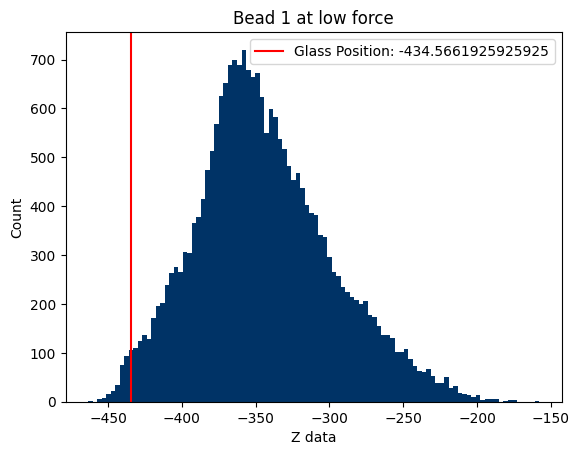

In [167]:
ref = dataFrame["zRefBead1"][lowStart:lowEnd]
exp = dataFrame["zExpBead3"][lowStart:lowEnd]

glassPosition = np.mean(np.sort(exp - ref)[0:675])

plt.hist(exp - ref, bins=100, color="#003366")
plt.axvline(glassPosition, color="red", label=f"Glass Position: {glassPosition}")
plt.title("Bead 1 at low force"); plt.xlabel("Z data"); plt.ylabel("Count")
plt.legend()
plt.show()

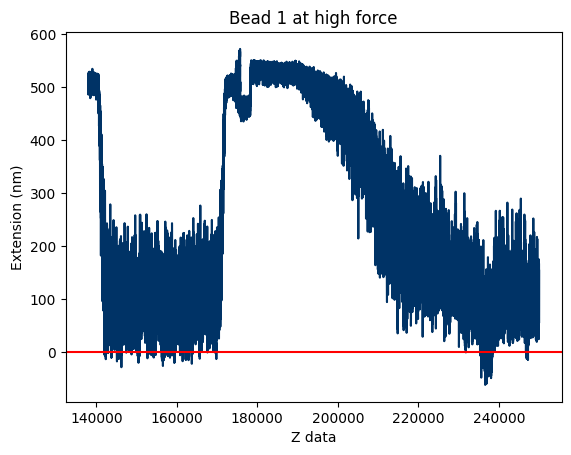

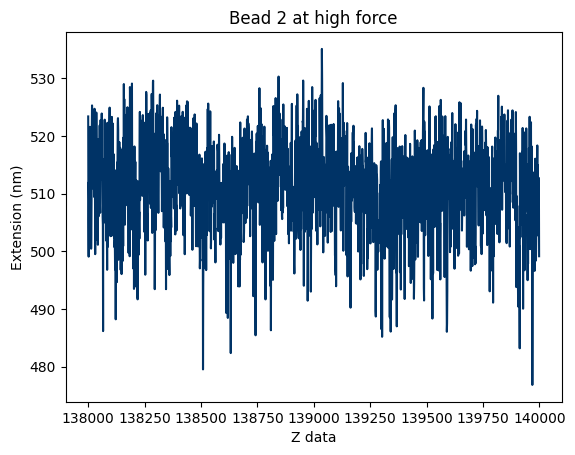

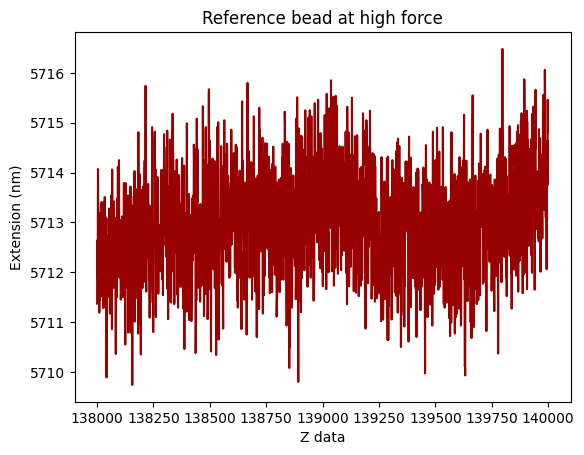

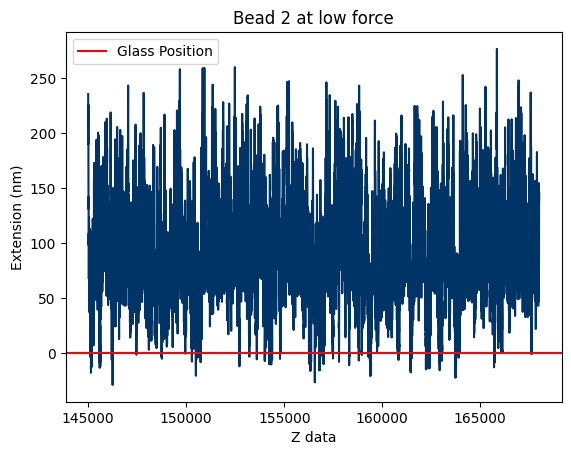

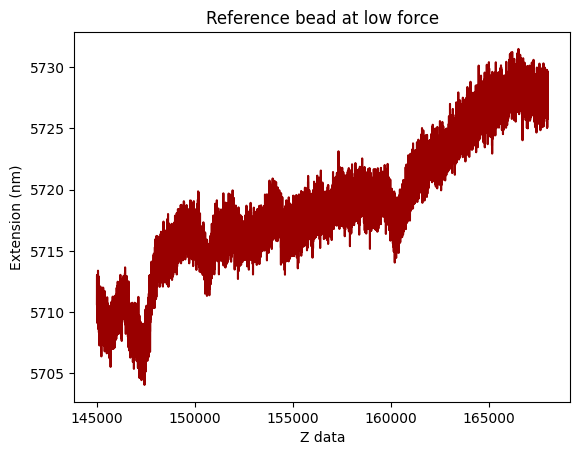

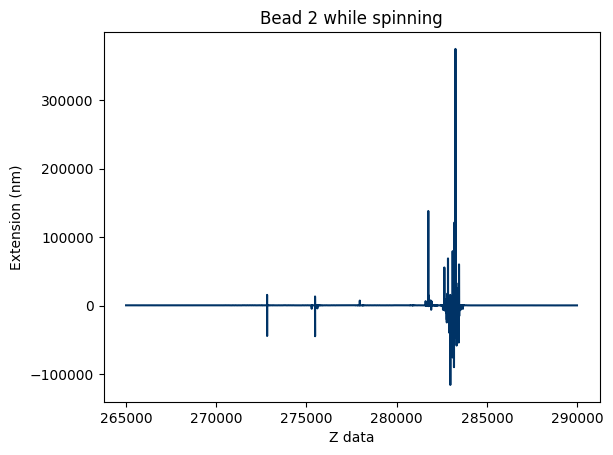

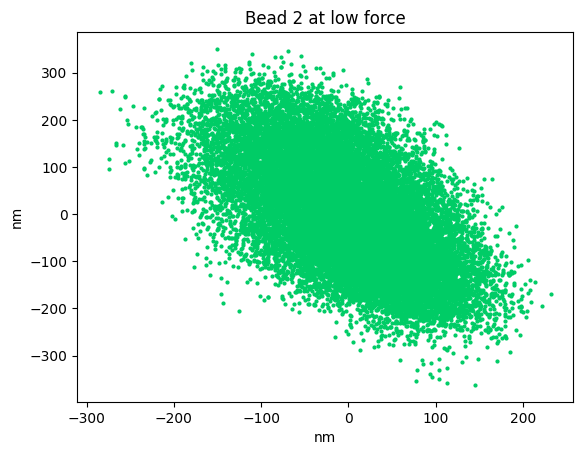

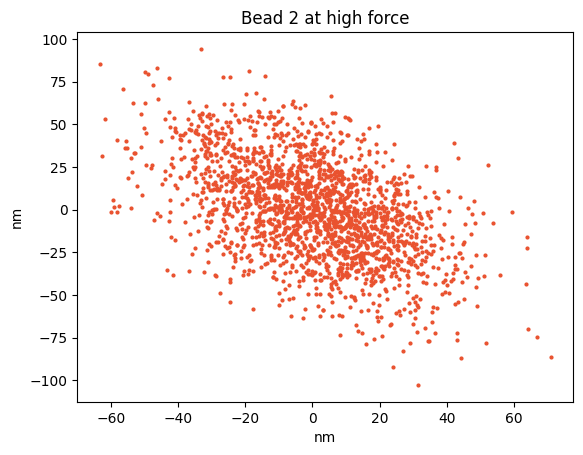

In [168]:
extension = dataFrame["zExpBead3"] - dataFrame["zRefBead1"] - glassPosition
beadX = dataFrame["xExpBead3"] - dataFrame["xRefBead1"]
beadY = dataFrame["yExpBead3"] - dataFrame["yRefBead1"]

plt.plot(extension[highStart:forceExtEnd], color="#003366")
plt.axhline(0, color="red", label="Glass Position")
plt.title("Bead 1 at high force"); plt.xlabel("Z data"); plt.ylabel("Extension (nm)")
plt.show()

plt.plot(extension[highStart:highEnd], color="#003366")
plt.title("Bead 2 at high force"); plt.xlabel("Z data"); plt.ylabel("Extension (nm)")
plt.show()

plt.plot(dataFrame["zRefBead1"][highStart:highEnd], color="#990000")
plt.title("Reference bead at high force"); plt.xlabel("Z data"); plt.ylabel("Extension (nm)")
plt.show()

plt.plot(extension[lowStart:lowEnd], color="#003366")
plt.title("Bead 2 at low force"); plt.xlabel("Z data"); plt.ylabel("Extension (nm)")
plt.axhline(0, color="red", label="Glass Position")
plt.legend()
plt.show()

plt.plot(dataFrame["zRefBead1"][lowStart:lowEnd], color="#990000")
plt.title("Reference bead at low force"); plt.xlabel("Z data"); plt.ylabel("Extension (nm)")
plt.show()

plt.plot(extension[spinStart:spinEnd], color="#003366")
plt.title("Bead 2 while spinning"); plt.xlabel("Z data"); plt.ylabel("Extension (nm)")
plt.show()


plt.scatter(beadX[lowStart:lowEnd] - np.mean(beadX[lowStart:lowEnd]), beadY[lowStart:lowEnd] - np.mean(beadY[lowStart:lowEnd]), s=4, color='#00cc66')
plt.title("Bead 2 at low force"); plt.xlabel("nm"); plt.ylabel("nm")
plt.show()

plt.scatter(beadX[highStart:highEnd] - np.mean(beadX[highStart:highEnd]), beadY[highStart:highEnd] - np.mean(beadY[highStart:highEnd]), s=4, color='#E9522F')
plt.title("Bead 2 at high force"); plt.xlabel("nm"); plt.ylabel("nm")
plt.show()

Low force using AV:  0.07330704239987264
Low force using PSD:  -0.0668031861165712
Low force using F = KbT*L/<x>:  0.06815821369749855


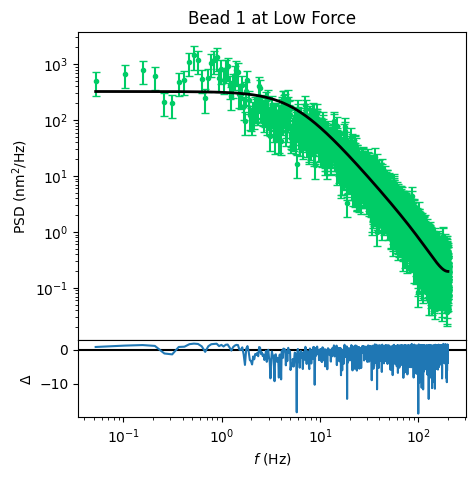

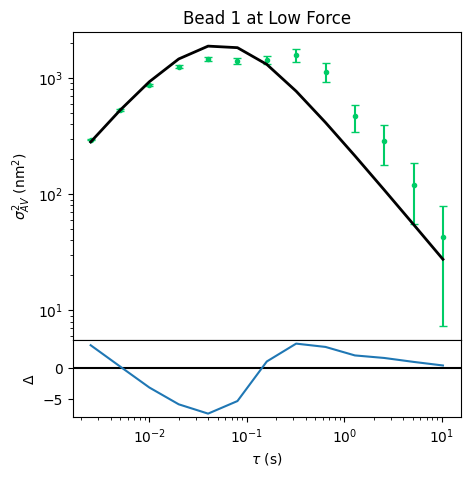

High force using AV:  3.580975794360874
High force using PSD:  3.5276039283006333
High force using F = KbT*L/<x>:  2.5212286712390806


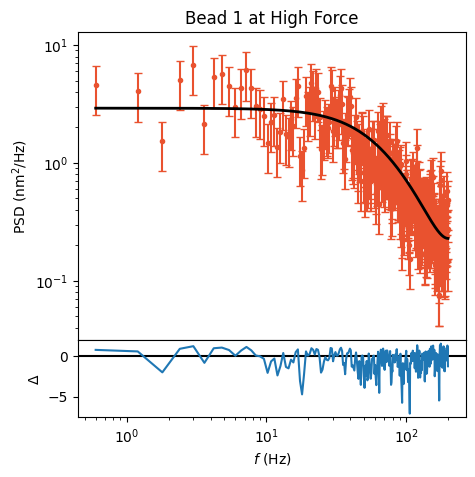

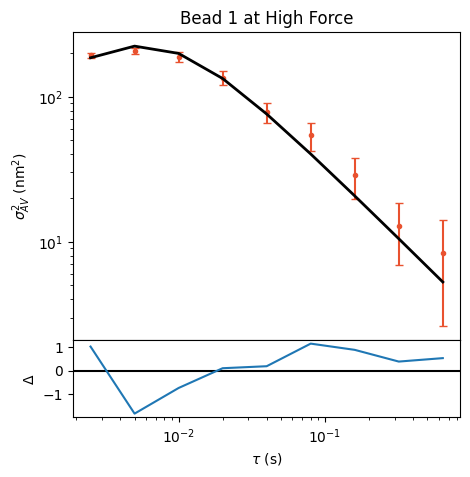

In [169]:
beadDiameter = 1000
fps = 400

medStart = 137000
medEnd = 138500

# Math
psd = PSD(beadX[lowStart:lowEnd], fps, bins=5)
psd.mlefit(viscosity=1e-9, radius=beadDiameter/2)
av = AV(beadX[lowStart:lowEnd], fps)
av.mlefit(viscosity=1e-9, radius=beadDiameter/2)

# Calculation and printing of the force
force = av.results['k']*np.mean(extension[lowStart:lowEnd])
print('Low force using AV: ', force)
force = psd.results['k']*np.mean(extension[lowStart:lowEnd])
print('Low force using PSD: ', force)
force = 4.1*np.mean(extension[lowStart:lowEnd])/np.var(beadX[lowStart:lowEnd])
print('Low force using F = KbT*L/<x>: ', force)

# Printing of PSD and AV Plots
fig, ax = psd.plot(data_color='#00cc66') #PSD
ax[0].set_title('Bead 1 at Low Force'); ax[0].set_xlabel('f (Hz)');
plt.show()

fig, ax = av.plot(data_color='#00cc66') #AV
ax[0].set_title('Bead 1 at Low Force')
plt.show()

# Math
psd = PSD(beadX[highStart:highEnd], fps, bins=5)
psd.mlefit(viscosity=1e-9, radius=beadDiameter/2)
av = AV(beadX[highStart:highEnd], fps)
av.mlefit(viscosity=1e-9, radius=beadDiameter/2)


# Calculation and printing of the force
force = av.results['k']*np.mean(extension[highStart:highEnd])
print('High force using AV: ', force)
force = psd.results['k']*np.mean(extension[highStart:highEnd])
print('High force using PSD: ', force)
force = 4.1*np.mean(extension[highStart:highEnd])/np.var(beadY[highStart:highEnd])
print('High force using F = KbT*L/<x>: ', force)

# Printing of PSD and AV Plots
fig, ax = psd.plot(data_color='#E9522F') #PSD
ax[0].set_title('Bead 1 at High Force'); ax[0].set_xlabel('f (Hz)');
plt.show()

fig, ax = av.plot(data_color='#E9522F') #AV
ax[0].set_title('Bead 1 at High Force')
plt.show()